In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px
import plotly.graph_objects as go
import dataframe_image as dfi
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [128]:
df = pd.read_csv("listingsEnglish2.csv")
df["location_list"]=df["location"].str.split(" in ")
df[["Type_of_Airbnb_Listing", "City"]] = pd.DataFrame(df.location_list.tolist(), index= df.index)
df[["Type_of_Airbnb_Listing", "City"]] = pd.DataFrame(df.location_list.tolist(), index= df.index)
df["rating_list"]=df["rating"].str.split(" ")
df[["Reviews_Overall_Rating", "#_of_Reviews"]] = pd.DataFrame(df.rating_list.tolist(), index= df.index)
df["#_of_Reviews"]=df["#_of_Reviews"].str.extract('(\d+)')
df = df.drop(['location_list','rating_list'], axis=1)
df["price"]= df["price"].str.extract('(\d+)')
df["Reviews_Overall_Rating"].replace('New', 0,inplace=True)
df['#_of_Reviews'] = df['#_of_Reviews'].fillna(0)
#df["#_of_Reviews"] = df["#_of_Reviews"].replace('NaN', 0,inplace=True)
#pattern = 'New'
#df['Reviews_Overall_Rating'] = df['Reviews_Overall_Rating'].astype(str).str.extract(pattern).fillna(0)
df

,Unnamed: 0,location,name,beds,date,price,rating,Type_of_Airbnb_Listing,City,Reviews_Overall_Rating,#_of_Reviews
0,0,Private room in Makati,TKA 407: Fully Furnished Studio near Makati CBD,1 double bed,Sep 20 – 27,16,4.8 (49),Private room,Makati,4.8,49
1,1,Apartment in Makati,TKA 408: Fully Furnished Studio near Makati CBD,1 double bed,Sep 25 – Oct 2,16,4.76 (45),Apartment,Makati,4.76,45
2,2,Apartment in Makati,Spectacular View at Gramercy 69th 1BR Penthouse!⭐,1 bed,Nov 12 – 19,91,4.79 (213),Apartment,Makati,4.79,213
3,3,Private room in Makati,Backpackers Private Room @ Makati,1 single bed,Aug 3 – 10,10,4.94 (16),Private room,Makati,4.94,16
4,4,Apartment in Makati,Top Location! Makati Greenbelt Laureano Di Trevi,1 queen bed,Dec 15 – 22,18,4.4 (10),Apartment,Makati,4.4,10
...,...,...,...,...,...,...,...,...,...,...,...
295,295,Condo in Makati,Beautiful Studio apartment with full amenities,1 bed,Nov 3 – 10,30,5.0 (7),Condo,Makati,5.0,7
296,296,Condo in Quezon City,City View 1 BR Unit @ GRASS RES T4 WiFi & NETFLIX,2 beds,Feb 8 – 15,28,4.88 (34),Condo,Quezon City,4.88,34
297,297,Loft in Makati,Premium loft unit beside the pool in Makati (...,1 bed,Aug 5 – 12,32,4.77 (14),Loft,Makati,4.77,14
298,298,Condo in Makati,"Corner View Oasis @ Greenbelt. Fast Wifi, +Net...",1 bed,Aug 25 – Sep 1,48,New,Condo,Makati,0,0


In [129]:
df.rename(columns = {'name':'Name_of_Listing', 'beds':'Beds_Available',
                              'price':'Price_in_USD'}, inplace = True)

In [130]:
df = df[['Name_of_Listing', 'City','Type_of_Airbnb_Listing','Beds_Available', 'Price_in_USD','Reviews_Overall_Rating','#_of_Reviews']]

In [131]:
df.head()

,Name_of_Listing,City,Type_of_Airbnb_Listing,Beds_Available,Price_in_USD,Reviews_Overall_Rating,#_of_Reviews
0,TKA 407: Fully Furnished Studio near Makati CBD,Makati,Private room,1 double bed,16,4.8,49
1,TKA 408: Fully Furnished Studio near Makati CBD,Makati,Apartment,1 double bed,16,4.76,45
2,Spectacular View at Gramercy 69th 1BR Penthouse!⭐,Makati,Apartment,1 bed,91,4.79,213
3,Backpackers Private Room @ Makati,Makati,Private room,1 single bed,10,4.94,16
4,Top Location! Makati Greenbelt Laureano Di Trevi,Makati,Apartment,1 queen bed,18,4.4,10


# Creating a DataFrame with UNIQUE Values as data is scraped from the Airbnb Manila Website

In [132]:
dfUNIQUE=df.drop_duplicates(subset = ["Name_of_Listing"])

In [136]:
len(dfUNIQUE)

254

In [137]:
# Out of the 300 scraped listings, only 254 are unique

In [138]:
# Getting the Unique Types of Airbnb Listings

In [139]:
dfUNIQUE.Type_of_Airbnb_Listing.value_counts()

Condo            169
Apartment         50
Private room      25
Loft               5
Hotel room         3
Home               1
Vacation home      1
Name: Type_of_Airbnb_Listing, dtype: int64

In [140]:
# Inspecting the Unique Locations

In [133]:
dfUNIQUE['Price_in_USD']=dfUNIQUE['Price_in_USD'].astype('int')
dfUNIQUE.Price_in_USD.describe()

count    254.000000
mean      33.625984
std       18.530337
min       10.000000
25%       22.000000
50%       29.000000
75%       41.000000
max      153.000000
Name: Price_in_USD, dtype: float64

In [134]:
dfUNIQUE['#_of_Reviews']=dfUNIQUE['#_of_Reviews'].astype('int')

In [135]:
dfUNIQUE['Reviews_Overall_Rating']=dfUNIQUE['Reviews_Overall_Rating'].astype('float')
dfUNIQUE.Price_in_USD.describe()

count    254.000000
mean      33.625984
std       18.530337
min       10.000000
25%       22.000000
50%       29.000000
75%       41.000000
max      153.000000
Name: Price_in_USD, dtype: float64

In [80]:
dfUNIQUE.Type_of_Airbnb_Listing.value_counts()

Condo            169
Apartment         50
Private room      25
Loft               5
Hotel room         3
Home               1
Vacation home      1
Name: Type_of_Airbnb_Listing, dtype: int64

In [81]:
dfUNIQUE.City.value_counts()

Makati            138
Manila             35
Quezon City        27
Mandaluyong        20
Pasay              19
Taguig              8
Pasig               2
Paco                1
Malate              1
Pasay City          1
Lungsod Quezon      1
Parañaque           1
Name: City, dtype: int64

In [141]:
dfUNIQUE['City'].replace('Malate', 'Manila',inplace=True)
dfUNIQUE['City'].replace('Lungsod Quezon', 'Quezon City',inplace=True)
dfUNIQUE['City'].replace('Paco ', 'Manila',inplace=True)
dfUNIQUE['City'].replace('Pasay City', 'Pasay',inplace=True)

In [83]:
dfUNIQUE.City.value_counts()

Makati         138
Manila          37
Quezon City     28
Mandaluyong     20
Pasay           20
Taguig           8
Pasig            2
Parañaque        1
Name: City, dtype: int64

In [84]:
dfUNIQUE

,Name_of_Listing,City,Type_of_Airbnb_Listing,Beds_Available,Price_in_USD,Reviews_Overall_Rating,#_of_Reviews
0,TKA 407: Fully Furnished Studio near Makati CBD,Makati,Private room,1 double bed,16,4.8,49
1,TKA 408: Fully Furnished Studio near Makati CBD,Makati,Apartment,1 double bed,16,4.76,45
2,Spectacular View at Gramercy 69th 1BR Penthouse!⭐,Makati,Apartment,1 bed,91,4.79,213
3,Backpackers Private Room @ Makati,Makati,Private room,1 single bed,10,4.94,16
4,Top Location! Makati Greenbelt Laureano Di Trevi,Makati,Apartment,1 queen bed,18,4.4,10
...,...,...,...,...,...,...,...
293,BGC Designer Loft - 2 BR Golf View,Taguig,Condo,2 beds,81,4.64,72
295,Beautiful Studio apartment with full amenities,Makati,Condo,1 bed,30,5.0,7
296,City View 1 BR Unit @ GRASS RES T4 WiFi & NETFLIX,Quezon City,Condo,2 beds,28,4.88,34
298,"Corner View Oasis @ Greenbelt. Fast Wifi, +Net...",Makati,Condo,1 bed,48,0,0


In [142]:
dfUNIQUE['Reviews_Overall_Rating'].replace('New', 0,inplace=True)
dfUNIQUE['#_of_Reviews']=dfUNIQUE['#_of_Reviews'].fillna(0)

In [34]:
dfUNIQUE

,Name_of_Listing,City,Type_of_Airbnb_Listing,Beds_Available,Price_in_USD,Reviews_Overall_Rating,#_of_Reviews
0,TKA 407: Fully Furnished Studio near Makati CBD,Makati,Private room,1 double bed,16,4.8,49
1,TKA 408: Fully Furnished Studio near Makati CBD,Makati,Apartment,1 double bed,16,4.76,45
2,Spectacular View at Gramercy 69th 1BR Penthouse!⭐,Makati,Apartment,1 bed,91,4.79,213
3,Backpackers Private Room @ Makati,Makati,Private room,1 single bed,10,4.94,16
4,Top Location! Makati Greenbelt Laureano Di Trevi,Makati,Apartment,1 queen bed,18,4.4,10
...,...,...,...,...,...,...,...
293,BGC Designer Loft - 2 BR Golf View,Taguig,Condo,2 beds,81,4.64,72
295,Beautiful Studio apartment with full amenities,Makati,Condo,1 bed,30,5.0,7
296,City View 1 BR Unit @ GRASS RES T4 WiFi & NETFLIX,Quezon City,Condo,2 beds,28,4.88,34
298,"Corner View Oasis @ Greenbelt. Fast Wifi, +Net...",Makati,Condo,1 bed,48,0,0


In [86]:
price_column = dfUNIQUE['Price_in_USD']
rating_column = dfUNIQUE['Reviews_Overall_Rating']
reviews_column = dfUNIQUE['#_of_Reviews']
city_column = dfUNIQUE['#_of_Reviews']
price_rating = dfUNIQUE[['Price_in_USD','Reviews_Overall_Rating']]

In [143]:
dfUNIQUE['Price_in_USD']=dfUNIQUE['Price_in_USD'].astype('int')
dfUNIQUE.Price_in_USD.describe()

count    254.000000
mean      33.625984
std       18.530337
min       10.000000
25%       22.000000
50%       29.000000
75%       41.000000
max      153.000000
Name: Price_in_USD, dtype: float64

In [105]:
pricesIQR = dfUNIQUE[dfUNIQUE.Price_in_USD < 40]

## Price per Night and Number of Reviews Scatter Plot

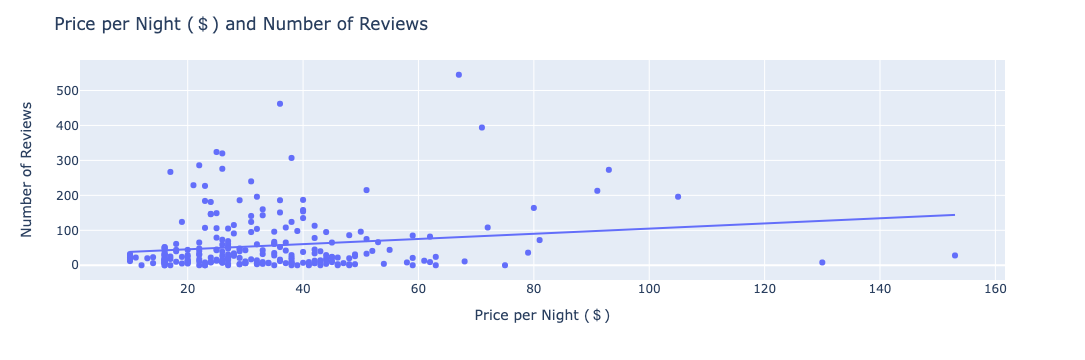

In [103]:
price_reviews_scatter = px.scatter(dfUNIQUE, x='Price_in_USD', y='#_of_Reviews', trendline='ols')
price_reviews_scatter.update_layout(title="Price per Night (＄) and Number of Reviews",
                                    xaxis_title="Price per Night (＄)",
                                    yaxis_title="Number of Reviews")
price_reviews_scatter.show()

## Price per Night and Reviews Overall Rating Scatter Plot

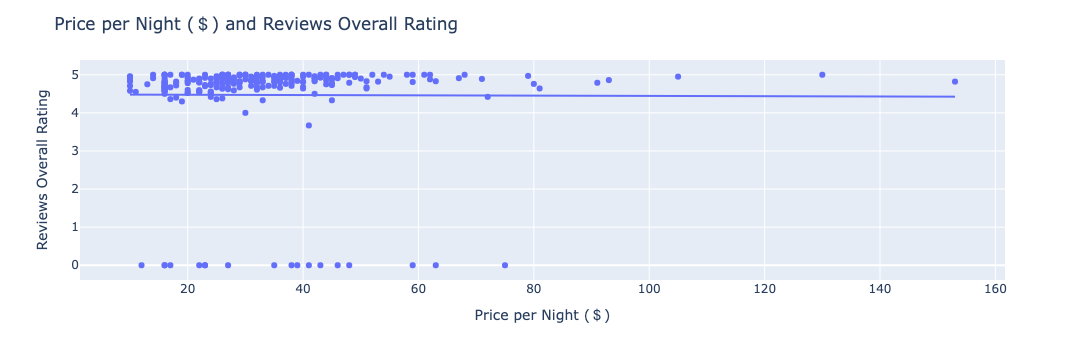

In [104]:
price_rating_scatter = px.scatter(dfUNIQUE, x='Price_in_USD', y='Reviews_Overall_Rating', trendline='ols')
price_rating_scatter.update_layout(title="Price per Night (＄) and Reviews Overall Rating",
                                    xaxis_title="Price per Night (＄)",
                                    yaxis_title="Reviews Overall Rating")
price_rating_scatter.show()

## Types of Airbnb Listing Pie Chart

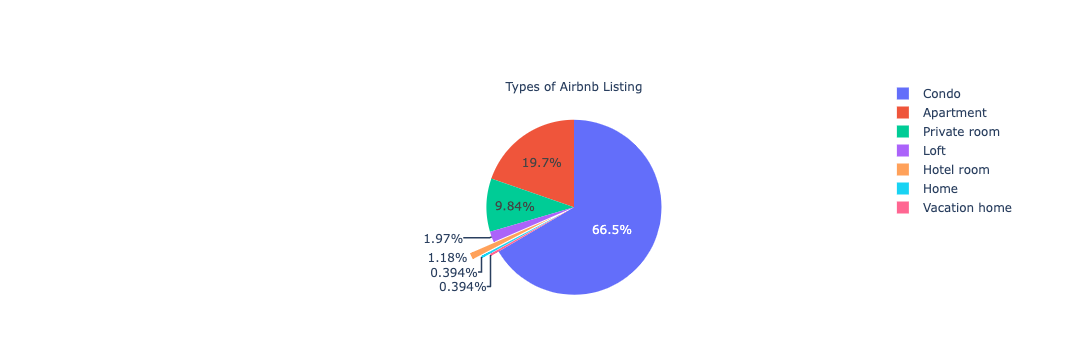

In [100]:
type_values = dfUNIQUE.Type_of_Airbnb_Listing.value_counts().values
type_labels = dfUNIQUE.Type_of_Airbnb_Listing.value_counts().index
type_pie = go.Figure(data=[go.Pie(labels=type_labels, values=type_values,  title='Types of Airbnb Listing', pull=[0, 0, 0, 0, 0.3, 0.2, 0.1])])
type_pie.update_layout(margin=dict(t=0, b=0, l=0, r=0))
type_pie.show()

## Type of Airbnb Listing and # of Reviews Table

In [119]:
type_reviews_table = dfUNIQUE[['Type_of_Airbnb_Listing','#_of_Reviews']].groupby('Type_of_Airbnb_Listing').agg(['mean','count']).sort_values(by=('#_of_Reviews','mean'), ascending=False).round(2)
type_reviews_table

#_of_Reviews      
                               mean count
Type_of_Airbnb_Listing                   
Hotel room                   128.33     3
Loft                          77.40     5
Apartment                     61.48    50
Condo                         57.21   169
Private room                  23.80    25
Home                          22.00     1
Vacation home                 19.00     1

In [123]:
dfi.export(type_reviews_table, "type_reviews_table.png")

objc[11147]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5c62eec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.134/Libraries/libGLESv2.dylib (0x1087ced18). One of the two will be used. Which one is undefined.
[0726/134503.412389:INFO:headless_shell.cc(660)] Written to file /var/folders/rf/ryzltj3n041dfr_8hm5_wgyc0000gn/T/tmp3y49y8w4/temp.png.


## Type of Airbnb Listing and # of Reviews Overall Rating Table

In [124]:
type_reviews_rating = dfUNIQUE[['Type_of_Airbnb_Listing','Reviews_Overall_Rating']].groupby('Type_of_Airbnb_Listing').agg(['mean','count']).sort_values(by=('Reviews_Overall_Rating','mean'), ascending=False).round(2)
type_reviews_rating

Reviews_Overall_Rating      
                                         mean count
Type_of_Airbnb_Listing                             
Vacation home                            5.00     1
Loft                                     4.93     5
Home                                     4.55     1
Apartment                                4.55    50
Condo                                    4.46   169
Private room                             4.39    25
Hotel room                               3.21     3

In [125]:
dfi.export(type_reviews_rating, "type_reviews_rating.png")

objc[11598]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5c62eec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/103.0.5060.134/Libraries/libGLESv2.dylib (0x105ed5d18). One of the two will be used. Which one is undefined.
[0726/143346.359825:INFO:headless_shell.cc(660)] Written to file /var/folders/rf/ryzltj3n041dfr_8hm5_wgyc0000gn/T/tmpdx88weno/temp.png.
